In [126]:
words = open('names.txt','r').read().splitlines()

Probabilistic Approach



In [37]:
#Statistics on teh dataset
print("The number of words in the dataset ", len(words))
print("The minimum length of the name ", min(len(w) for w in words))
print("The maximum length of the name ", max(len(w) for w in words))

The number of words in the dataset  32033
The minimum length of the name  2
The maximum length of the name  15


In [38]:
b = {}
for w in words:
    #<S> is to indicate the start characters and <E> is to indicate the end characters
    characters = ['<S>'] + list(w) + ['<E>']
    #Form a bigram tuple => a pair of two characters
    for ch1, ch2 in zip(characters,characters[1:]):
        bigram = (ch1,ch2)
        #Form a dictionary with bigrams and their count
        b[bigram] = b.get(bigram,0) +1

In [39]:
#key takes a custom function - a lambda function which sorts by the elements in the 1st index
sorted(b.items(), key = lambda kv: -kv[1] )

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

Lets visualize the distribution of all the bigrams (character pairs). This will help us to know which pairs of characters are more common to occur together and which characters are more probable as a starting and ending characters.

We do this by creating a 27x27 matrix with 26 letters of alphabets in index 0 to 25 and special character <.> that indicate the start and end of each word so as to find the starting and ending characters. This <.> is the 26th character. The value at the intersection of a particular row and column indicate the count of the pair occuring together.

In [127]:
import torch

In [128]:
#Create a tensor of dimension 27x27 all intialized to zeros
N = torch.zeros((27,27), dtype = torch.int32)

In [129]:
#We take all the characters from the dataset and assign it a integer value. - A lookup table
chars = sorted(list(set("".join(words))))           #['a','b','c',...,'z']
stoi = {s:i+1 for i,s in enumerate(chars)}            #{'.':0,'a':1,'b':2,'c':3,...,'z':26}      
stoi['.'] = 0                                       #Let the . be the first index
# Creating a reverse lookup table as well
itos = {i:s for s,i in stoi.items()}                #{0:'.',1:'a',...,26:'z'}

We need to know all the characters in the dataset. If they are just english names they would contain the 26 letters of the alphabet but it is not wise to hardcode the characters in the dataset based on prior knowledge instead we create the list from dataset itself. 
In the first line all the words in the dataset are combined into a single large string and then passed to a set which removes all the duplicates (here in this case we get all the english alphabets). We convert the set to a list and then sort. 
Now we create a dictionary that act as a look-up table for the integer values for each characters.
enumerate(chars) returns a tuple with the index of the element and the value.

In [130]:
for w in words:
    characters = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(characters,characters[1:]):
        index1 = stoi[ch1]
        index2 = stoi[ch2]
        N[index1,index2] +=1  #N is now a matrice of characters and their counts.

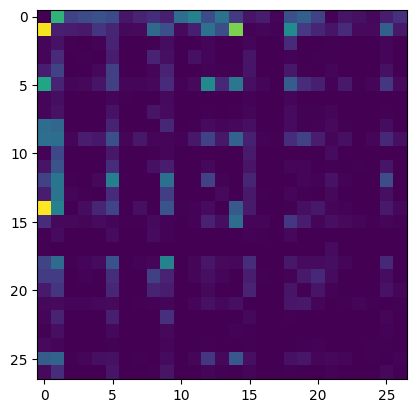

In [131]:
#Creating a simple visualtization of the distribution matrix N
import matplotlib.pyplot as plt

plt.imshow(N)

(-0.5, 26.5, 26.5, -0.5)

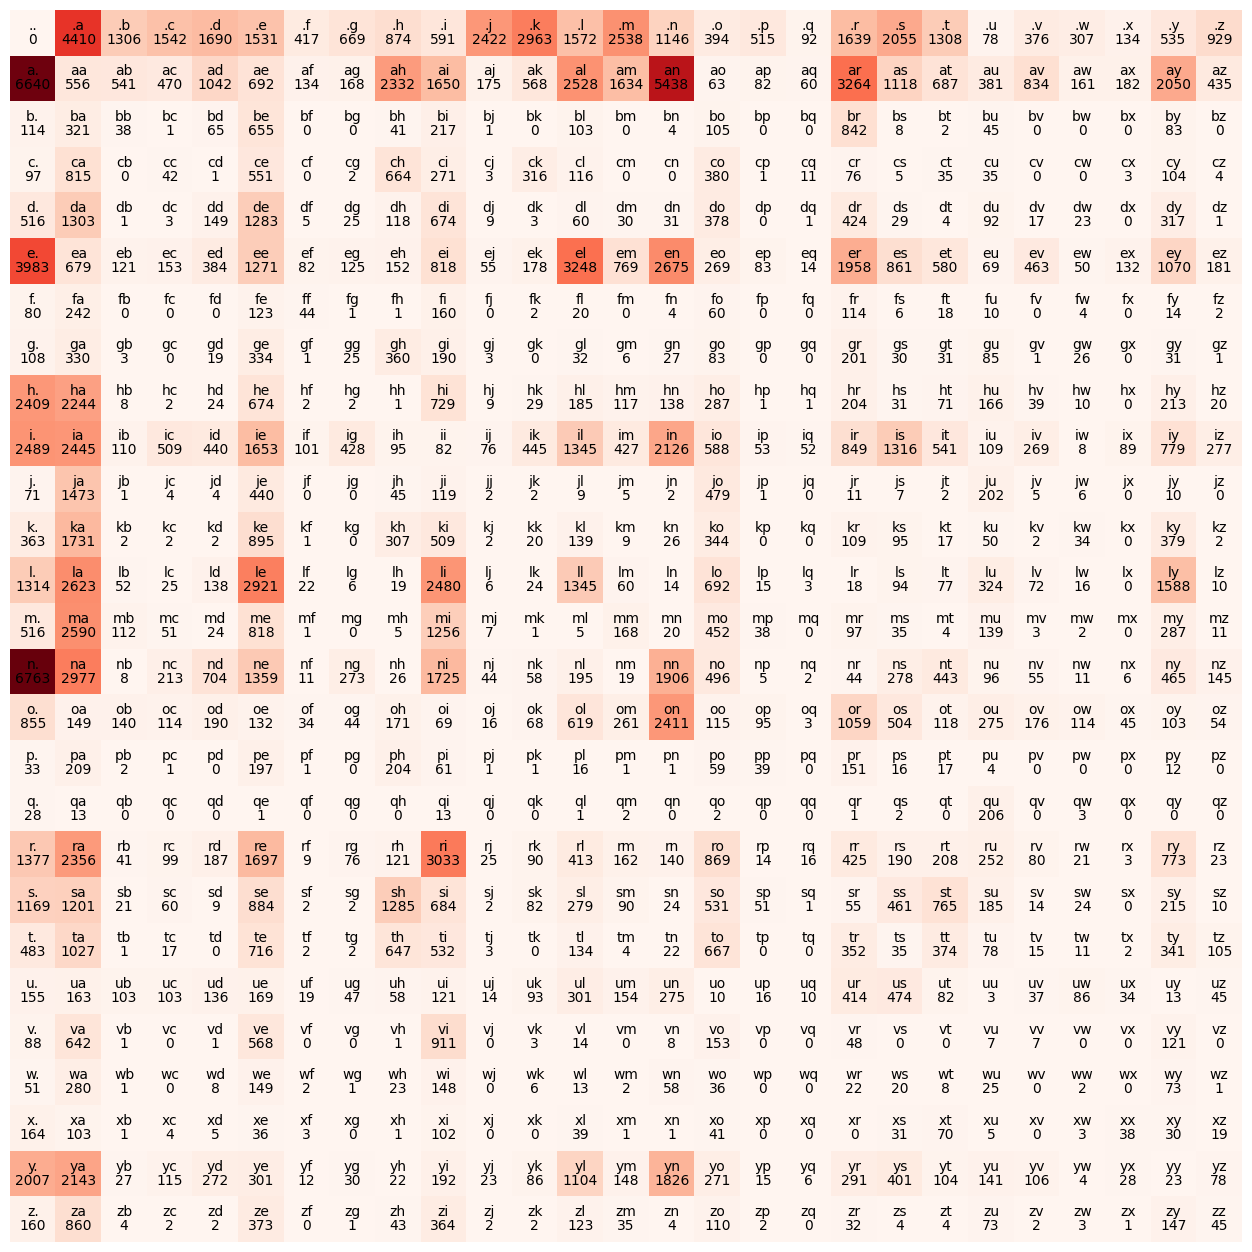

In [132]:
#Better visualisation
plt.figure(figsize=(16,16))
plt.imshow(N,cmap = 'Reds')      #Plot the entire matrix in shades of red
#We iterate through each index of the matrix and fill its value
for i in range(27):
    for j in range(27):
        chrstr = itos[i] + itos[j]         # Indicate the bigram at that index
        # We insert the text at each index (j,i) along the x-axis (j) and y-axis(i) then the text to be inserted, horizontal alignment and vertical alignment.
        plt.text(j,i,chrstr,ha = "center",va="bottom",color="black") 
        plt.text(j,i,N[i,j].item(),ha="center",va = "top",color="black")
plt.axis('off')


In [133]:
N[0]
#These represent the number of times a character has been the starting letter starting from '.','a','b',...'z'. But we will convert them into probabilities.

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

torch.multinomial and torch.generator

Returns a tensor where each row contains indices sampled from a multinomial distribution given in the corresponding row of the input tensor.
Eg. torch.multinomial(input, num_samples, replacement=False, *, generator=None, out=None) → LongTensor

torch.generator returns a generator object that manages the algorithm that produces the random numbers. The manual seed is used generate a deterministic random numbers across all devices and at all times.

In [80]:
#g = torch.Generator()
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator = g)
print("The non- normalised random numbers are ",p)      
p = p/p.sum()
print("The normalised random numbers ",p)           #Sums upto 1 like a probability distribution.
torch.multinomial(p, 20, replacement=True, generator=g)

The non- normalised random numbers are  tensor([0.7081, 0.3542, 0.1054])
The normalised random numbers  tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [137]:
#Generating bigrams based on the probability distributions from the dataset
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix =0
    while True:
        p = N[ix].float()  #In the first iteration we take the count frequencies of first row N[0] which indicate the starting characters of each word
        p = p / p.sum()    #Normalised distribution

        ix = torch.multinomial(p,1,replacement = True,generator = g).item() # It returns a tensor so we extract the index of the selected element through item()
        #print(ix)
        out.append(itos[ix]) # The output is appended with the string version of the selected integer (0-26)
        if ix == 0:
            break      #Stop if we reach the end which is <.> character.
    print("".join(out))

junide.
janasah.
p.
cony.
a.


In [135]:
#Alternatively if we use the uniform distribution where all the alphabets are equally likely.
for i in range(5):
    out = []
    ix =0
    while True:
        p_uniform = torch.ones(26)
        p_uniform = p_uniform/26
        ix = torch.multinomial(p_uniform,1,replacement=True,generator = g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print("".join(out))
    

nnqfjiirltohcogsjgwtvudlhnpauyjbilevhajkdbduinrwibtldsnjyievyvaftbcffvmumthyfodtumjrpfytslwjhrjagq.
coreaysehocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofsuxhddgosfmptpagicu.
rjpiufmthdt.
rkrrsru.
iyumuyfy.


On comparing both the above generations we can conclude that the generation based on the data distribution of dataset is better and makes more sense that a uniform distribution of all characters.

In [138]:
P = (N+1).float() 
# Extract the count frequencies into another matrix P and now we can create a probability distribution based on these frequencies.
#We add 1 to each count so as to avoid 0 (zero) probabilities. This is called model smoothing.
#P = P/ P.sum() This P.sum() is the summation over entire 27x27 matrix. But we need the summation over each row.
#We can use the dim attribute to specify the dimension across which we need to sum the elements.
#The keepdim attribute is used maintain the dimension without squeezing the dimsions.
print("The shape of sum across the each row with keepdim = False",P.sum(1).shape)
print("The shape of sum across the each row with keepdim = True",P.sum(1,keepdim=True).shape)

The shape of sum across the each row with keepdim = False torch.Size([27])
The shape of sum across the each row with keepdim = True torch.Size([27, 1])


In [139]:
P = P/P.sum(1,keepdim=True)

#Here keepdim = True is very important since squeezing the dimensions result in wrong values.
#Here we perform tensor broadcasting where P.shape() = (27,27) and P.sum(1,keepdim=True).shape() = (27,1) where the second vector is strected through
# columns to match the dimensions (27,27)
# But broadcasting  P.shape() = (27,27) and P.sum(1).shape() = (27). Though this also complies the broadcasting rules and can be broadcasted but we get a wrong result.
# (27,27) and (,27) since broadcasting rules work from the rightside and instead of streching thorugh columns the second vector is strechted through rows and we normalize 
# across columns and not rows leading to worng result.

#Simple Example
""" A = [[1,2,3],       B = [1,2,3]
     [3,4,5],
     [4,6,7]]

Shape : (3,3)       Shape :(3) = >(,3) Thus on bradcasting we do it [[1,2,3],
                                                                     [1,2,3]       ==> Normalising across columns
                                                                     [1,2,3]].
Instead if B was a [[1],
                    [2],
                    [3]] of shape (3,1) then the broadcasting would result in [[1,1,1],
                                                                               [2,2,2],             ==> Normalising across rows
                                                                               [3,3,3]] """

' A = [[1,2,3],       B = [1,2,3]\n     [3,4,5],\n     [4,6,7]]\n\nShape : (3,3)       Shape :(3) = >(,3) Thus on bradcasting we do it [[1,2,3],\n                                                                     [1,2,3]       ==> Normalising across columns\n                                                                     [1,2,3]].\nInstead if B was a [[1],\n                    [2],\n                    [3]] of shape (3,1) then the broadcasting would result in [[1,1,1],\n                                                                               [2,2,2],             ==> Normalising across rows\n                                                                               [3,3,3]] '

Tensor Broadcasting 

Broadcasting is a mechanism which allows tensors/arrays/matices with different numbers of dimensions to be added or multiplied together 
by (virtually) replicating the smaller tensor along the dimensions that it is lacking.

Eg. [[1,2],          [[1,2]] 
     [3,4],     +     
     [5,6]]

Shape : (3,2)       Shape: (1,2). On brodacsting the second vector

    [[1,2],           [[1,2],
     [3,4],     +      [1,2],    = This broadcasting makes the addition of a (3,2) matrix with a (1,2) vector.   
     [5,6]]            [1,2]]

But not all Vectors or tensors can be broadcasted. There are semantics for broadcasting.
Two tensors are “broadcastable” if the following rules hold:

Each tensor has at least one dimension.

When iterating over the dimension sizes, starting at the trailing (rightmost) dimension, 
i.  the dimension sizes must either be equal, 
ii. one of them is 1, or one of them does not exist.

Eg. A = 8 x 1 x 6 x 1 (4d array), B = 7 x 1 x 5 (3d array). Performing a elementwise operation such as addition/subtraction or division.

    A = 8 x 1 x 6 x 1
    B =     7 x 1 x 5
    Res =8 x7 x 6 x 5 

Eg. A = 4 and B = 3 Both are 1D arrays ,and their trailing dimensions dont match and thus not broadcastable

    A = 2x1 and B = 8x4x3. Again, the rightmost dimensions 1 and 3 pass the broadcasting rules but the next dimension of 2 and 4 dont match nor either 1 of the dimension is missing or 1 (second from last dimensions mismatched).

In [140]:
#Generating bigrams based on the probability distributions from the dataset
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix =0
    while True:
        p = P[ix]  #In the first iteration we take the count frequencies of first row N[0] which indicate the starting characters of each word


        ix = torch.multinomial(p,1,replacement = True,generator = g).item() # It returns a tensor so we extract the index of the selected element through item()
        #print(ix)
        out.append(itos[ix]) # The output is appended with the string version of the selected integer (0-26)
        if ix == 0:
            break      #Stop if we reach the end which is <.> character.
    print("".join(out))

junide.
janasah.
p.
cony.
a.


Calculating the Loss of the model

Maximum Log Likelihood

Likelihood of an model is the product of all probabilities. It tell how probable a model is in the sense that, we can predict the bigrams occuring in the dataset with a greater probability. We would like the likelihood of the model to be maximum. While the loss is defined as the negative log likelihood which should be minimum.

Log is included for mathematical convinence since the multiplication of multiple probabilities (between 0 and 1) might lead to a even smaller number so introducing log will transform the multiplication to addition.

log(a*b*c) = log(a) + log(b) + log(c)

In [146]:
#Calculating the negative log likelihood (loss) for all the bigrams in the dataset
log_likelihood = 0.0
bigrams_count =0
for w in words:
    chrs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        probability = P[idx1,idx2]
        log_prob = torch.log(probability)
        log_likelihood += log_prob
        bigrams_count+=1
        #print(f'{ch1}{ch2}: {probability:.4f} {log_prob:.4f}')
print(f'{log_likelihood=}')
neg_loglikelihood = - log_likelihood
print(f'{neg_loglikelihood=}')
avg_neg_likelihood = neg_loglikelihood/bigrams_count
print(f'{avg_neg_likelihood=}')


log_likelihood=tensor(-559951.5625)
neg_loglikelihood=tensor(559951.5625)
avg_neg_likelihood=tensor(2.4544)


The Neural Network Approach - Character Level Language Model.

We input a single character to the neural network and allow the network to make predictions on the next possible character to the given input character.

1. Creating the training set of the Bigrams

In [206]:
#Creating the training set of the Bigrams (x,y)

x_data = []
y_data = []
for w in words[:1]:
    characters = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(characters,characters[1:]):
        print(ch1,ch2)
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        x_data.append(idx1)
        y_data.append(idx2)
        
#Convert the list into a tensor
x_data = torch.tensor(x_data)
y_data = torch.tensor(y_data)
print(x_data,y_data)


. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1]) tensor([ 5, 13, 13,  1,  0])


Tensor Vs tensor

In [207]:
#The input is passed as a One Hot encoded vector

import torch.nn.functional as F
x_encoded = F.one_hot(x_data,num_classes=27).float() # It is useful to have the input vector as a float datatype so we typecast the vector to float
x_encoded


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

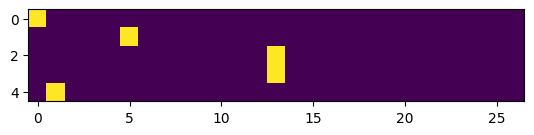

In [152]:
plt.imshow(x_encoded)

In [208]:
#Constructing the first layer with 27 neurons. A simple neuron performs Wx + b operation (we dont consider the bias here)
g = torch.Generator().manual_seed(2147483647)
Weights = torch.randn((27,27),generator=g, requires_grad=True) # random numbers based on standard normal distribution. 

In [217]:
#Calculating the log odds and then taking exponential to convert it to a count like value
#The probability is similar to a softmax function. This gives the probabilities for the next character. The character with largest probability is the next predicted character by the neural network.
#We add requires_grad since we use the gradient of the weights to optimize the netwrok later 
logits = x_encoded @ Weights           # (5,27) @ (27,27) = (5,27)
counts = logits.exp()           #Converting the logits (log odds)  into count values similar to N matrix
probability = counts / counts.sum(1,keepdims = True) # Normalising the counts across the row
#probability             #Probability is now a tensor of shape (5,27)


In [164]:
#Calculating Loss 
nlls = torch.zeros(5)
print("The bigram Model - without any optimization")
for i in range(5):
    x = x_data[i].item()
    y = y_data[i].item()
    print(f'Actual Value at the {i+1} th position is {itos[x]} and actual following character is {itos[y]}')

    print(f'\n Input to the neural network: {x}')
    print(f'Output probabilities from the network for the next character {probability[i]}')
    predicted_probability = probability[i,y] # This is the probability of the actual next character as predicted by the network.
    print("The probability of actual next character as predicted by the network ",predicted_probability.item()) 
    #Probability is a tensor and a element from tensor is also represented as a tensor so we use item() to extract the value.
    negative_loglikelihood = - torch.log(predicted_probability)
    print("The loss (negative loglikelihood) for this character is ", negative_loglikelihood.item())
    nlls[i] = negative_loglikelihood

    print("\n")
    print("The average negative log likelihood (loss) over the entire word is ", nlls.mean().item())




The bigram Model - without any optimization
Actual Value at the 1 th position is . and actual following character is e

 Input to the neural network: 0
Output probabilities from the network for the next character tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
The probability of actual next character as predicted by the network  0.01228625513613224
The loss (negative loglikelihood) for this character is  4.399273872375488


The average negative log likelihood (loss) over the entire word is  0.8798547983169556
Actual Value at the 2 th position is e and actual following character is m

 Input to the neural network: 5
Output probabilities from the network for the next character tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0

As we can see the loss is too high since the probability of predicting the actual next character by the network is very low. We can improve the performance by optimizing the model.

Gradient Optimization

In [218]:
#Vectorized Loss
# The calculate the average log likelihood that we calculated above more succintly. We take the predicted probabilities of the actual next character
# for each position torch.arange(5) = [0,1,2,3,4]. We need probability[0,5] 5-> corresponds to letter e, probability[1,13] where 13 corresponds to letter m and 
# probability[2,13], probability[3,1] and probability[4,0]
loss = -probability[torch.arange(5),y_data].log().mean()
loss

tensor(3.7292, grad_fn=<NegBackward0>)

In [215]:
#Backward Pass - We introduce the gradient to the weight tensor

Weights.grad = None #Set to zero the gradient
loss.backward()

In [216]:
Weights.data += -0.1 * Weights.grad

In [219]:
#Combining everything and building the neural net for the entire dataset

#Creating the training data
x_data = []
y_data = []
for w in words:
    characters = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(characters,characters[1:]):
        #print(ch1,ch2)
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        x_data.append(idx1)
        y_data.append(idx2)
        
#Convert the list into a tensor
x_data = torch.tensor(x_data)
y_data = torch.tensor(y_data)
#print(x_data,y_data)
bigrams_count = x_data.nelement() #Returns the total number of bigrams in the data



In [220]:
#Encoding the Input X into one hot encoded tensor for each character
import torch.nn.functional as F
x_encoded = F.one_hot(x_data,num_classes=27).float() # It is useful to have the input vector as a float datatype so we typecast the vector to float
print(x_encoded.shape) # There are 228146 bigrams in total
x_encoded[0] # And each character in a bigram is encoded as a one hot encoded vector and y has the corresponding next chracter as the labels.

torch.Size([228146, 27])


tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [221]:
#Constructing a Single layer neural network with 27 neurons

g = torch.Generator().manual_seed(2147483647)
Weights = torch.randn((27,27),generator=g, requires_grad=True)

In [233]:
learning_rate = 50
for i  in range(150):
    
    #Defining the forward pass
    logits = x_encoded @ Weights           # (5,27) @ (27,27) = (5,27)
    counts = logits.exp()           #Converting the logits (log odds)  into count values similar to N matrix
    probability = counts / counts.sum(1,keepdims = True) # Normalising the counts across the row

    #Calculating the Loss with Regularization
    loss = - probability[torch.arange(bigrams_count),y_data].log().mean() + 0.01 *(Weights**2).mean()
    print(loss.item())

    #Backwardpass
    Weights.grad = None
    loss.backward()

    Weights.data += -learning_rate *Weights.grad 


2.4807398319244385
2.4807369709014893
2.480733871459961
2.4807310104370117
2.4807283878326416
2.4807252883911133
2.480722188949585
2.480719804763794
2.480717182159424
2.4807143211364746
2.4807114601135254
2.4807088375091553
2.480706214904785
2.480703353881836
2.480700969696045
2.480698347091675
2.480695962905884
2.4806935787200928
2.4806909561157227
2.4806885719299316
2.4806859493255615
2.4806838035583496
2.4806814193725586
2.480679750442505
2.4806783199310303
2.480679512023926
2.4806861877441406
2.480710506439209
2.480781316757202
2.480994462966919
2.4815523624420166
2.4832775592803955
2.4867796897888184
2.497807025909424
2.501847743988037
2.522096872329712
2.4974803924560547
2.4981935024261475
2.501331090927124
2.520831346511841
2.497805118560791
2.4994454383850098
2.501286745071411
2.520291805267334
2.497830390930176
2.4999799728393555
2.5013163089752197
2.5200343132019043
2.497807741165161
2.500221014022827
2.5013418197631836
2.519909381866455
2.4977829456329346
2.5003278255462646


Regularisation



In [240]:
#Sampling from the neural network
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    out = []
    idx = 0
    while True:
        #Input to the neural network
        xenc = F.one_hot(torch.tensor([idx]),num_classes=27).float() # We make the idx as a list since we want a (1,27) shape 2D tensor 
        #to perform matrix multiplication with (27,27) shape weights. 
        # torch.tensor(idx) create a 1D tensor of shape (27).
        #print(xenc.shape)
        logits = xenc @ Weights
        counts = logits.exp()
        #print(counts.shape)
        p = counts / counts.sum(1, keepdims = True)


        # Predict the next character
        idx = torch.multinomial(p,1,replacement= True,generator = g)
        out.append(itos[idx.item()])
        if idx == 0:
            break
    print("".join(out))

junide.
ja.
asah.
p.
cfay.


This generates similar kind of words that were generated using the probablistic model. since the loss of both the models are similar. In the Neural Networks approach optimised by the gradient descent approach, the weights are randomly initialised and the weights are optimised such that the loss is lowered. We have stopped the optimisation such that the weights have the similar values as the probability counts (N/P matrix) from the probablistic model.
